In [376]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, peak_widths, peak_prominences

plt.rcParams.update({'font.size': 12})

In [504]:
s2 = np.loadtxt('data/val2.dat')
s3 = np.loadtxt('data/val3.dat')

In [463]:
# Filtriranje signala

f = 1

s2 = s2[::f]
s3 = s3[::f]
print(len(s3))

N = 130

s2 = s2[:N]
s3 = s3[:N]
print(len(s3))

ts = np.arange(N)
dt = ts[1] - ts[0]

print(N)

512
130
130


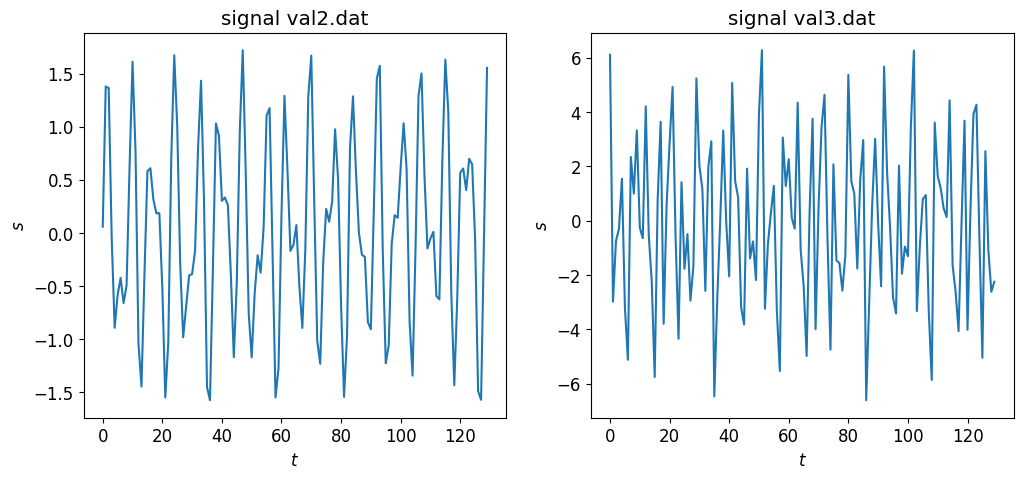

In [464]:
# Prikaz signala

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('signal val2.dat')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$s$')
ax.plot(ts, s2)

ax = fig.add_subplot(1, 2, 2)
ax.set_title('signal val3.dat')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$s$')
ax.plot(ts, s3)

In [466]:
# Prikaz okenskih funkcij

N = s2.shape[0]

sigma = 100.

no_window = np.ones(N, dtype=float)
Bartlett = 1. - np.abs(np.arange(N, dtype=float) - float(N)/2.) / (float(N)/2.)
Hann = 1./2. * (1. - np.cos(2.*np.pi*np.arange(N, dtype=float)/float(N)))
Welch = 1. - ((np.arange(N, dtype=float) - float(N)/2.) / (float(N)/2.))**2.
Gauss = np.exp(-((np.arange(N, dtype=float) - float(N)/2.)/sigma)**2.)

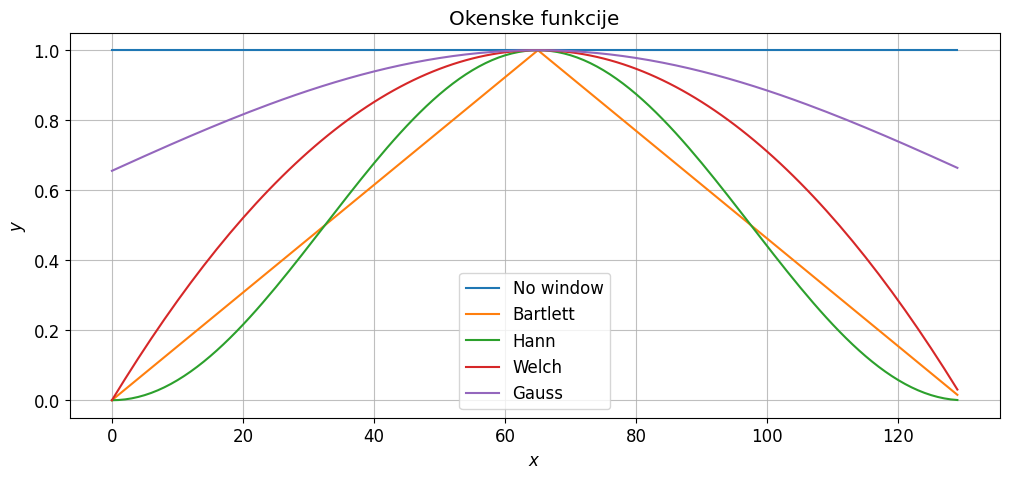

In [467]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Okenske funkcije')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.grid(alpha=0.8)
ax.plot(ts, no_window, label='No window')
ax.plot(ts, Bartlett, label='Bartlett')
ax.plot(ts, Hann, label='Hann')
ax.plot(ts, Welch, label='Welch')
ax.plot(ts, Gauss, label='Gauss')
ax.legend()

plt.show()

In [383]:
# Fourierova transformacija

def DFT(s, window='No window', sigma=100.):

    s = np.asarray(s, dtype=float)
    N = s.shape[0]

    if window == 'No window':
        w = np.ones(N, dtype=float)
    elif window == 'Bartlett':
        w = 1. - np.abs(np.arange(N, dtype=float) - float(N)/2.) / (float(N)/2.)
    elif window == 'Hann':
        w = 1./2. * (1. - np.cos(2.*np.pi*np.arange(N, dtype=float)/float(N)))
    elif window == 'Welch':
        w = 1. - ((np.arange(N, dtype=float) - float(N)/2.) / (float(N)/2.))**2.
    elif window == 'Gauss':
        w = np.exp(-((np.arange(N, dtype=float) - float(N)/2.)/sigma)**2.)

    S = np.zeros_like(s, dtype=complex)

    for i in range(0, N):
        a = 0.
        for k in range(N):
            a += w[k]*s[k]*np.exp(-1j * 2 * np.pi * k * i / N)
        S[i] = a

    # Power spectrum
    W = np.sum(w**2)
    P = np.zeros(round(N/2))
    P[0] = 1./W * np.abs(S[0])**2
    # P[-1] = 1./W * np.abs(S[round(N/2)])**2
    
    for i in range(1, len(P)):
        P[i] = 1./(2.*W) * (np.abs(S[i])**2 + np.abs(S[N-i])**2)

    return S, P

In [468]:
S2, P2 = DFT(s2)
S2_Bartlett, P2_Bartlett = DFT(s2, window='Bartlett')
S2_Hann, P2_Hann = DFT(s2, window='Hann')
S2_Welch, P2_Welch = DFT(s2, window='Welch')
S2_Gauss, P2_Gauss = DFT(s2, window='Gauss')

S3, P3 = DFT(s3)
S2_Bartlett, P3_Bartlett = DFT(s3, window='Bartlett')
S3_Hann, P3_Hann = DFT(s3, window='Hann')
S3_Welch, P3_Welch = DFT(s3, window='Welch')
S3_Gauss, P3_Gauss = DFT(s3, window='Gauss')

nuc = 1. / (2. * dt)
nus = np.linspace(0., nuc, round(N/2))
dnu = nus[1]-nus[0]

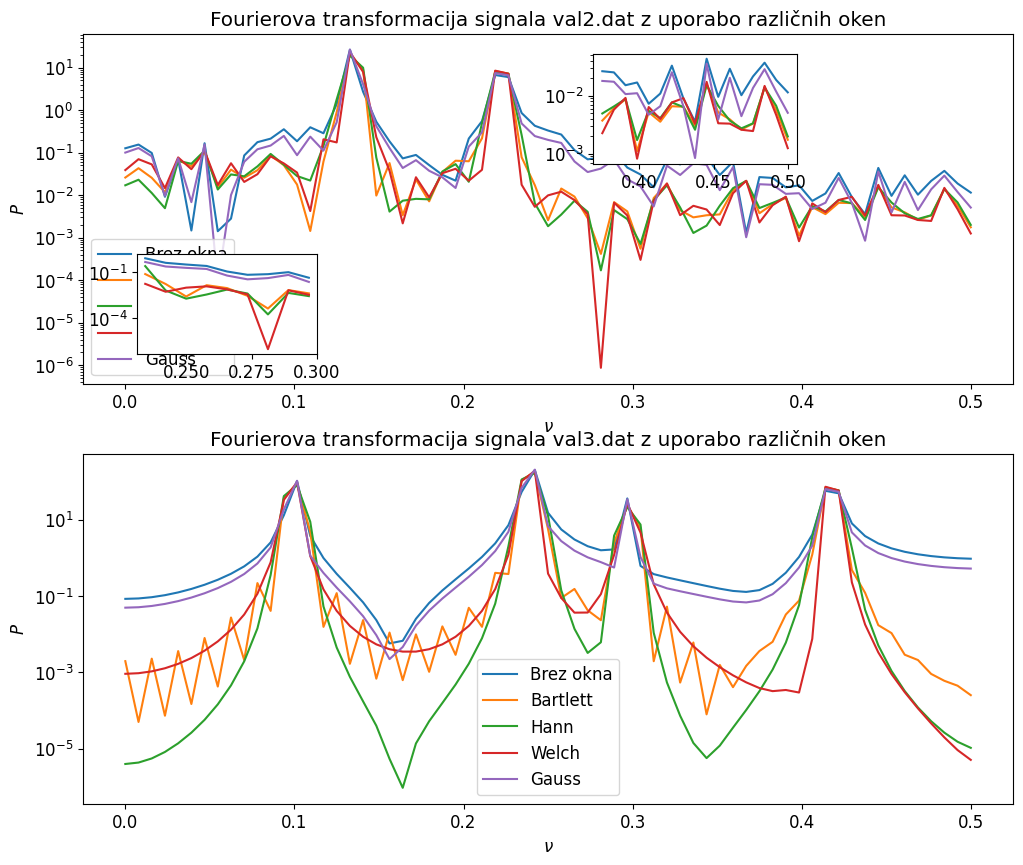

In [469]:
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 1, 1)
ax.set_title('Fourierova transformacija signala val2.dat z uporabo različnih oken')
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$P$')
ax.set_yscale('log')
ax.plot(nus, P2, label='Brez okna')
ax.plot(nus, P2_Bartlett, label='Bartlett')
ax.plot(nus, P2_Hann, label='Hann')
ax.plot(nus, P2_Welch, label='Welch')
ax.plot(nus, P2_Gauss, label='Gauss')
#ax.set_ylim((0.0001, 100))
ax.legend()

ax_inset = fig.add_axes([0.17, 0.56, 0.15, 0.10])
ax_inset.set_yscale('log')
ax_inset.plot(nus[30:39], P2[30:39], label='Brez okna')
ax_inset.plot(nus[30:39], P2_Bartlett[30:39], label='Bartlett')
ax_inset.plot(nus[30:39], P2_Hann[30:39], label='Hann')
ax_inset.plot(nus[30:39], P2_Welch[30:39], label='Welch')
ax_inset.plot(nus[30:39], P2_Gauss[30:39], label='Gauss')

ax_inset = fig.add_axes([0.55, 0.75, 0.17, 0.11])
ax_inset.set_yscale('log')
ax_inset.plot(nus[48:65], P2[48:65], label='Brez okna')
ax_inset.plot(nus[48:65], P2_Bartlett[48:65], label='Bartlett')
ax_inset.plot(nus[48:65], P2_Hann[48:65], label='Hann')
ax_inset.plot(nus[48:65], P2_Welch[48:65], label='Welch')
ax_inset.plot(nus[48:65], P2_Gauss[48:65], label='Gauss')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Fourierova transformacija signala val3.dat z uporabo različnih oken')
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$P$')
ax.set_yscale('log')
ax.plot(nus, P3, label='Brez okna')
ax.plot(nus, P3_Bartlett, label='Bartlett')
ax.plot(nus, P3_Hann, label='Hann')
ax.plot(nus, P3_Welch, label='Welch')
ax.plot(nus, P3_Gauss, label='Gauss')
ax.legend()

In [498]:
indices_P2 = find_peaks(P2, height=5.)
widths_P2 = peak_widths(P2, indices_P2[0])
prominences_abs_P2 = peak_prominences(P2, indices_P2[0]) # Za koliko se vrh loči
prominences_rel_P2 = peak_prominences(np.log10(P2), indices_P2[0]) # Za koliko velikostnih redov se vrh loči

indices_P2_Bartlett = find_peaks(P2_Bartlett, height=5.)
widths_P2_Bartlett = peak_widths(P2_Bartlett, indices_P2_Bartlett[0])
prominences_abs_P2_Bartlett = peak_prominences(P2_Bartlett, indices_P2_Bartlett[0]) # Za koliko se vrh loči
prominences_rel_P2_Bartlett = peak_prominences(np.log10(P2_Bartlett), indices_P2_Bartlett[0]) # Za koliko velikostnih redov se vrh loči

indices_P2_Hann = find_peaks(P2_Hann, height=5.)
widths_P2_Hann = peak_widths(P2_Hann, indices_P2_Hann[0])
prominences_abs_P2_Hann = peak_prominences(P2_Hann, indices_P2_Hann[0]) # Za koliko se vrh loči
prominences_rel_P2_Hann = peak_prominences(np.log10(P2_Hann), indices_P2_Hann[0]) # Za koliko velikostnih redov se vrh loči

indices_P2_Welch = find_peaks(P2_Welch, height=5.)
widths_P2_Welch = peak_widths(P2_Welch, indices_P2_Welch[0])
prominences_abs_P2_Welch = peak_prominences(P2_Welch, indices_P2_Welch[0]) # Za koliko se vrh loči
prominences_rel_P2_Welch = peak_prominences(np.log10(P2_Welch), indices_P2_Welch[0]) # Za koliko velikostnih redov se vrh loči

indices_P2_Gauss = find_peaks(P2_Gauss, height=5.)
widths_P2_Gauss = peak_widths(P2_Gauss, indices_P2_Gauss[0])
prominences_abs_P2_Gauss = peak_prominences(P2_Gauss, indices_P2_Gauss[0]) # Za koliko se vrh loči
prominences_rel_P2_Gauss = peak_prominences(np.log10(P2_Gauss), indices_P2_Gauss[0]) # Za koliko velikostnih redov se vrh loči


indices_P3 = find_peaks(P3, height=5.)
widths_P3 = peak_widths(P3, indices_P3[0])
prominences_abs_P3 = peak_prominences(P3, indices_P3[0]) # Za koliko se vrh loči
prominences_rel_P3 = peak_prominences(np.log10(P3), indices_P3[0]) # Za koliko velikostnih redov se vrh loči

indices_P3_Bartlett = find_peaks(P3_Bartlett, height=5.)
widths_P3_Bartlett = peak_widths(P3_Bartlett, indices_P3_Bartlett[0])
prominences_abs_P3_Bartlett = peak_prominences(P3_Bartlett, indices_P3_Bartlett[0]) # Za koliko se vrh loči
prominences_rel_P3_Bartlett = peak_prominences(np.log10(P3_Bartlett), indices_P3_Bartlett[0]) # Za koliko velikostnih redov se vrh loči

indices_P3_Hann = find_peaks(P3_Hann, height=5.)
widths_P3_Hann = peak_widths(P3_Hann, indices_P3_Hann[0])
prominences_abs_P3_Hann = peak_prominences(P3_Hann, indices_P3_Hann[0]) # Za koliko se vrh loči
prominences_rel_P3_Hann = peak_prominences(np.log10(P3_Hann), indices_P3_Hann[0]) # Za koliko velikostnih redov se vrh loči

indices_P3_Welch = find_peaks(P3_Welch, height=5.)
widths_P3_Welch = peak_widths(P3_Welch, indices_P3_Welch[0])
prominences_abs_P3_Welch = peak_prominences(P3_Welch, indices_P3_Welch[0]) # Za koliko se vrh loči
prominences_rel_P3_Welch = peak_prominences(np.log10(P3_Welch), indices_P3_Welch[0]) # Za koliko velikostnih redov se vrh loči

indices_P3_Gauss = find_peaks(P3_Gauss, height=5.)
widths_P3_Gauss = peak_widths(P3_Gauss, indices_P3_Gauss[0])
prominences_abs_P3_Gauss = peak_prominences(P3_Gauss, indices_P3_Gauss[0]) # Za koliko se vrh loči
prominences_rel_P3_Gauss = peak_prominences(np.log10(P3_Gauss), indices_P3_Gauss[0]) # Za koliko velikostnih redov se vrh loči

In [499]:
print(nus[indices_P2[0]])
print(nus[indices_P2_Bartlett[0]])
print(nus[indices_P2_Gauss[0]])
print(nus[indices_P2_Hann[0]])
print(nus[indices_P2_Welch[0]])
print(nus[indices_P3[0]])
print(nus[indices_P3_Bartlett[0]])
print(nus[indices_P3_Gauss[0]])
print(nus[indices_P3_Hann[0]])
print(nus[indices_P3_Welch[0]])

[0.03333333 0.05490196]
[0.03333333 0.05490196]
[0.03333333 0.05490196]
[0.03333333 0.05490196]
[0.03333333 0.05490196]
[0.0254902  0.06078431 0.0745098  0.10392157]
[0.0254902  0.06078431 0.0745098  0.10392157]
[0.0254902  0.06078431 0.0745098  0.10392157]
[0.0254902  0.06078431 0.0745098  0.10392157]
[0.0254902  0.06078431 0.0745098  0.10392157]


In [393]:
# prikaz lastnosti za s2

peaks = ('1. vrh', '2. vrh')

heights = {
    'Brez okna': (indices_P2[1]['peak_heights'][0], indices_P2[1]['peak_heights'][1]),
    'Bartlett': (indices_P2_Bartlett[1]['peak_heights'][0], indices_P2_Bartlett[1]['peak_heights'][1]),
    'Hann': (indices_P2_Hann[1]['peak_heights'][0], indices_P2_Hann[1]['peak_heights'][1]),
    'Welch': (indices_P2_Welch[1]['peak_heights'][0], indices_P2_Welch[1]['peak_heights'][1]),
    'Gauss': (indices_P2_Gauss[1]['peak_heights'][0], indices_P2_Gauss[1]['peak_heights'][1])
}

FWHM = {
    'Brez okna': (dnu*widths_P2[0][0], dnu*widths_P2[0][1]),
    'Bartlett': (dnu*widths_P2_Bartlett[0][0], dnu*widths_P2_Bartlett[0][1]),
    'Hann': (dnu*widths_P2_Hann[0][0], dnu*widths_P2_Hann[0][1]),
    'Welch': (dnu*widths_P2_Welch[0][0], dnu*widths_P2_Welch[0][1]),
    'Gauss': (dnu*widths_P2_Gauss[0][0], dnu*widths_P2_Gauss[0][1])
}

prominence_abs = {
    'Brez okna': (prominences_abs_P2[0][0], prominences_abs_P2[0][1]),
    'Bartlett': (prominences_abs_P2_Bartlett[0][0], prominences_abs_P2_Bartlett[0][1]),
    'Hann': (prominences_abs_P2_Hann[0][0], prominences_abs_P2_Hann[0][1]),
    'Welch': (prominences_abs_P2_Welch[0][0], prominences_abs_P2_Welch[0][1]),
    'Gauss': (prominences_abs_P2_Gauss[0][0], prominences_abs_P2_Gauss[0][1])
}

prominence_rel = {
    'Brez okna': (prominences_rel_P2[0][0], prominences_rel_P2[0][1]),
    'Bartlett': (prominences_rel_P2_Bartlett[0][0], prominences_rel_P2_Bartlett[0][1]),
    'Hann': (prominences_rel_P2_Hann[0][0], prominences_rel_P2_Hann[0][1]),
    'Welch': (prominences_rel_P2_Welch[0][0], prominences_rel_P2_Welch[0][1]),
    'Gauss': (prominences_rel_P2_Gauss[0][0], prominences_rel_P2_Gauss[0][1])
}

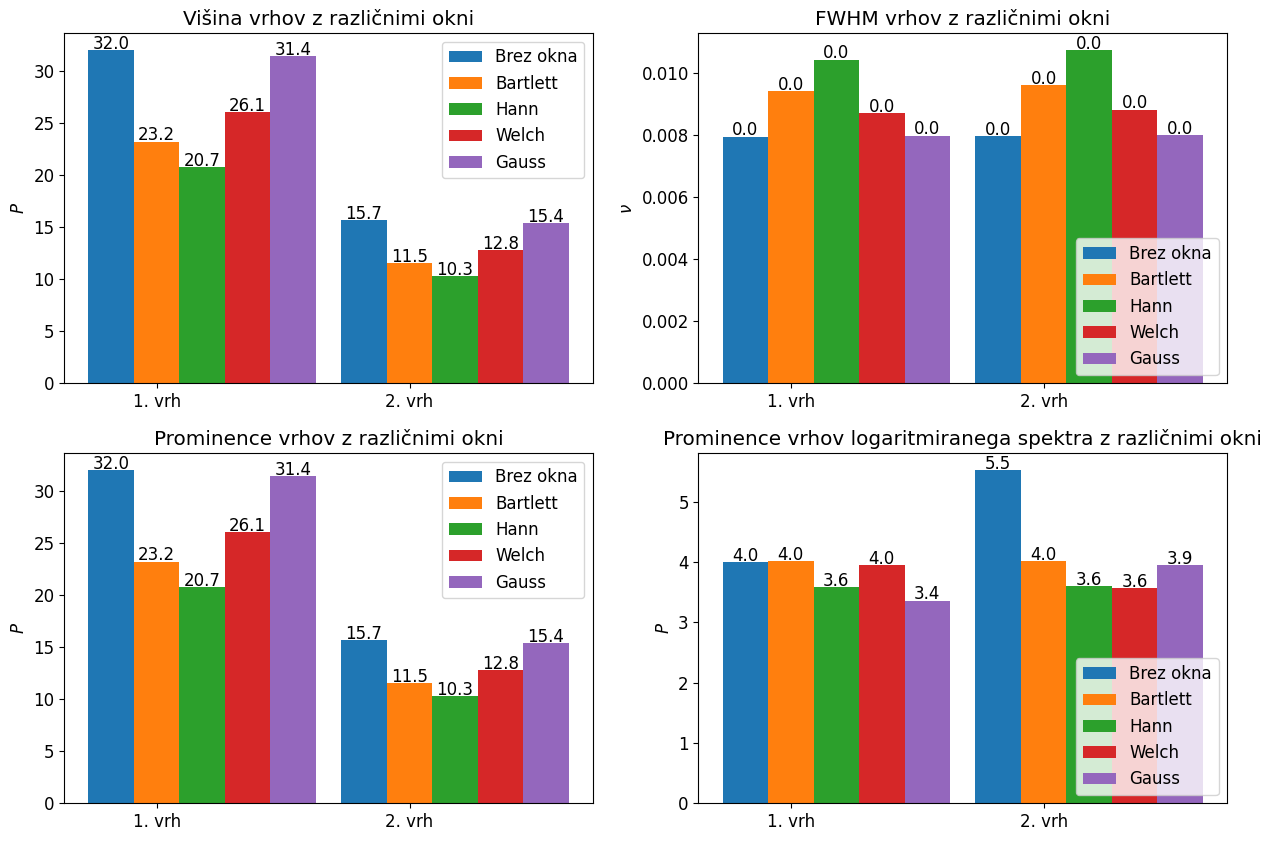

In [394]:
fig = plt.figure(figsize=(15, 10))

x = np.arange(len(peaks))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

ax = fig.add_subplot(2, 2, 1)

for attribute, measurement in heights.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Višina vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend()

multiplier = 0

ax = fig.add_subplot(2, 2, 2)

for attribute, measurement in FWHM.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$\nu$')
ax.set_title('FWHM vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend(loc='lower right')

multiplier = 0

ax = fig.add_subplot(2, 2, 3)

for attribute, measurement in prominence_abs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Prominence vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend()

multiplier = 0

ax = fig.add_subplot(2, 2, 4)

for attribute, measurement in prominence_rel.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Prominence vrhov logaritmiranega spektra z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend(loc='lower right')

plt.show()

In [395]:
# Prikaz lastnosti za s3

# prikaz lastnosti za s2

peaks = ('1. vrh', '2. vrh', '3. vrh', '4. vrh')

heights = {
    'Brez okna': (indices_P3[1]['peak_heights'][0], indices_P3[1]['peak_heights'][1], indices_P3[1]['peak_heights'][2], indices_P3[1]['peak_heights'][3]),
    'Bartlett': (indices_P3_Bartlett[1]['peak_heights'][0], indices_P3_Bartlett[1]['peak_heights'][1], indices_P3_Bartlett[1]['peak_heights'][2], indices_P3_Bartlett[1]['peak_heights'][3]),
    'Hann': (indices_P3_Hann[1]['peak_heights'][0], indices_P3_Hann[1]['peak_heights'][1], indices_P3_Hann[1]['peak_heights'][2], indices_P3_Hann[1]['peak_heights'][3]),
    'Welch': (indices_P3_Welch[1]['peak_heights'][0], indices_P3_Welch[1]['peak_heights'][1], indices_P3_Welch[1]['peak_heights'][2], indices_P3_Welch[1]['peak_heights'][3]),
    'Gauss': (indices_P3_Gauss[1]['peak_heights'][0], indices_P3_Gauss[1]['peak_heights'][1], indices_P3_Gauss[1]['peak_heights'][2], indices_P3_Gauss[1]['peak_heights'][3])
}

FWHM = {
    'Brez okna': (dnu*widths_P3[0][0], dnu*widths_P3[0][1], dnu*widths_P3[0][2], dnu*widths_P3[0][3]),
    'Bartlett': (dnu*widths_P3_Bartlett[0][0], dnu*widths_P3_Bartlett[0][1], dnu*widths_P3_Bartlett[0][2], dnu*widths_P3_Bartlett[0][3]),
    'Hann': (dnu*widths_P3_Hann[0][0], dnu*widths_P3_Hann[0][1], dnu*widths_P3_Hann[0][2], dnu*widths_P3_Hann[0][3]),
    'Welch': (dnu*widths_P3_Welch[0][0], dnu*widths_P3_Welch[0][1], dnu*widths_P3_Welch[0][2], dnu*widths_P3_Welch[0][3]),
    'Gauss': (dnu*widths_P3_Gauss[0][0], dnu*widths_P3_Gauss[0][1], dnu*widths_P3_Gauss[0][2], dnu*widths_P3_Gauss[0][3])
}

prominence_abs = {
    'Brez okna': (prominences_abs_P3[0][0], prominences_abs_P3[0][1], prominences_abs_P3[0][2], prominences_abs_P3[0][3]),
    'Bartlett': (prominences_abs_P3_Bartlett[0][0], prominences_abs_P3_Bartlett[0][1], prominences_abs_P3_Bartlett[0][2], prominences_abs_P3_Bartlett[0][3]),
    'Hann': (prominences_abs_P3_Hann[0][0], prominences_abs_P3_Hann[0][1], prominences_abs_P3_Hann[0][2], prominences_abs_P3_Hann[0][3]),
    'Welch': (prominences_abs_P3_Welch[0][0], prominences_abs_P3_Welch[0][1], prominences_abs_P3_Welch[0][2], prominences_abs_P3_Welch[0][3]),
    'Gauss': (prominences_abs_P3_Gauss[0][0], prominences_abs_P3_Gauss[0][1], prominences_abs_P3_Gauss[0][2], prominences_abs_P3_Gauss[0][3])
}

prominence_rel = {
    'Brez okna': (prominences_rel_P3[0][0], prominences_rel_P3[0][1], prominences_rel_P3[0][2], prominences_rel_P3[0][3]),
    'Bartlett': (prominences_rel_P3_Bartlett[0][0], prominences_rel_P3_Bartlett[0][1], prominences_rel_P3_Bartlett[0][2], prominences_rel_P3_Bartlett[0][3]),
    'Hann': (prominences_rel_P3_Hann[0][0], prominences_rel_P3_Hann[0][1], prominences_rel_P3_Hann[0][2], prominences_rel_P3_Hann[0][3]),
    'Welch': (prominences_rel_P3_Welch[0][0], prominences_rel_P3_Welch[0][1], prominences_rel_P3_Welch[0][2], prominences_rel_P3_Welch[0][3]),
    'Gauss': (prominences_rel_P3_Gauss[0][0], prominences_rel_P3_Gauss[0][1], prominences_rel_P3_Gauss[0][2], prominences_rel_P3_Gauss[0][3])
}

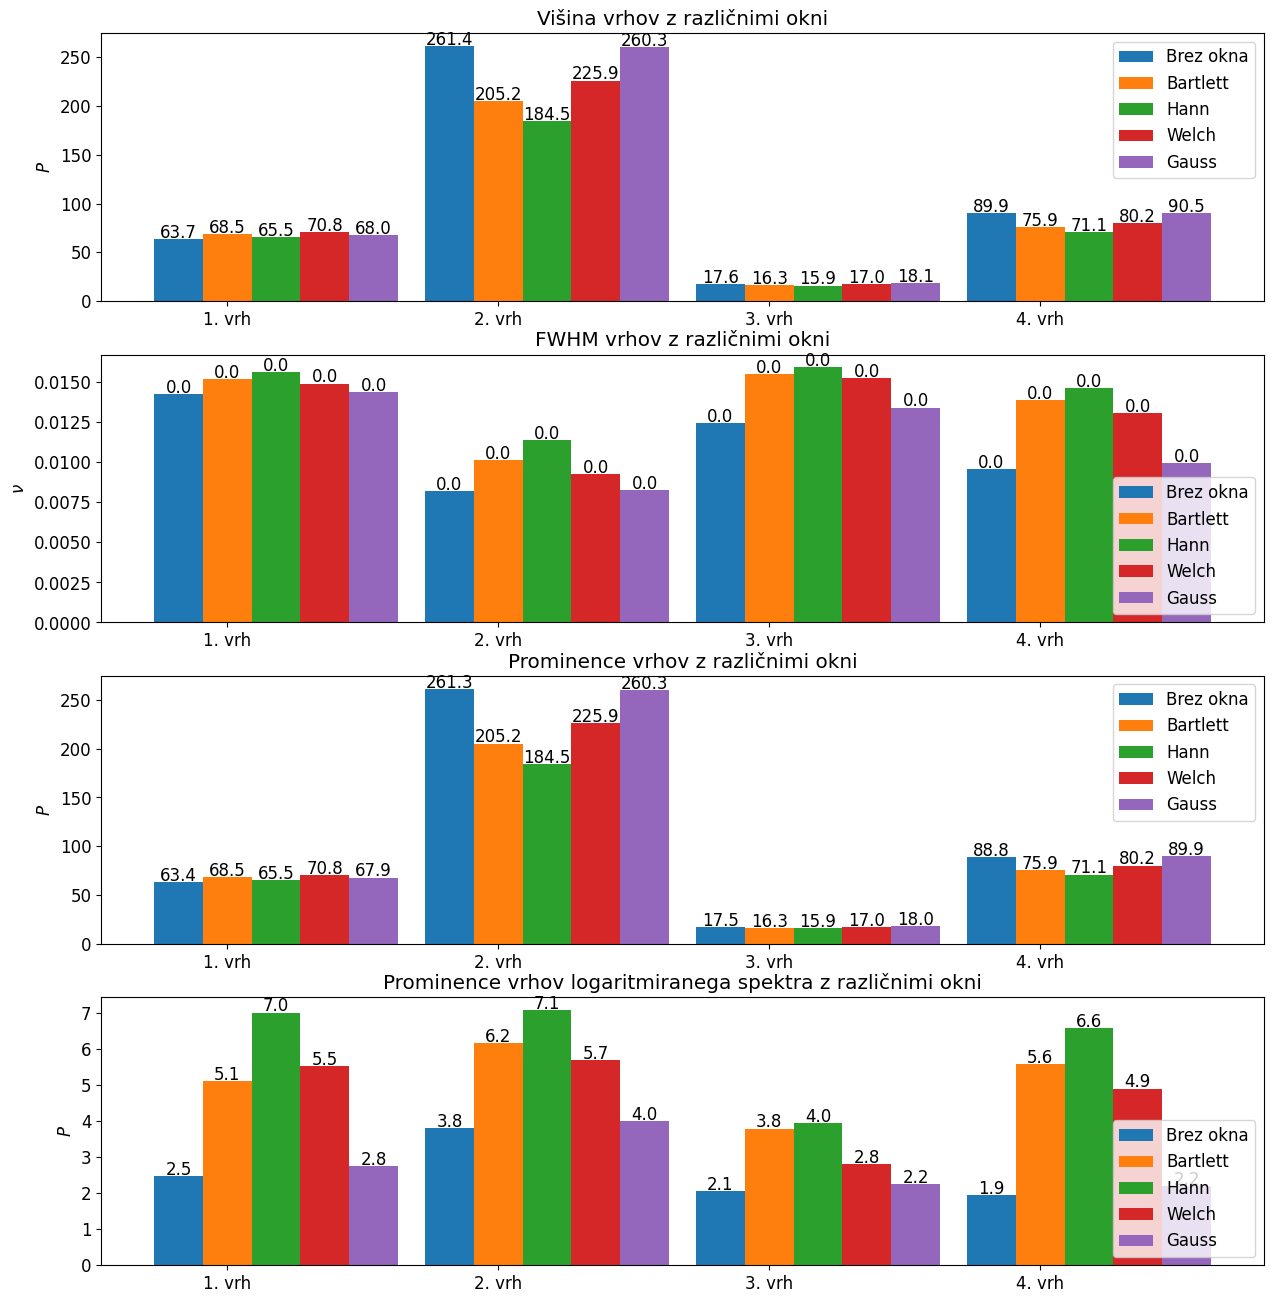

In [396]:
fig = plt.figure(figsize=(15, 16))

x = np.arange(len(peaks))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

ax = fig.add_subplot(4, 1, 1)

for attribute, measurement in heights.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Višina vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend()

multiplier = 0

ax = fig.add_subplot(4, 1, 2)

for attribute, measurement in FWHM.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$\nu$')
ax.set_title('FWHM vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend(loc='lower right')

multiplier = 0

ax = fig.add_subplot(4, 1, 3)

for attribute, measurement in prominence_abs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Prominence vrhov z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend()

multiplier = 0

ax = fig.add_subplot(4, 1, 4)

for attribute, measurement in prominence_rel.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.1f', padding=-2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P$')
ax.set_title('Prominence vrhov logaritmiranega spektra z različnimi okni')
ax.set_xticks(x + width)  # Adjusted the xticks
ax.set_xticklabels(peaks)  # Added set_xticklabels
ax.legend(loc='lower right')

plt.show()

In [505]:
# Višina, FWHM, prominence ter prominence logaritmiranega spekra

Ns = np.arange(128, 513, 1, dtype=int)

heights11 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
heights12 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs11 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs12 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs11 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs12 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel11 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel12 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}


heights21 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
heights22 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
heights23 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
heights24 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs21 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs22 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs23 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
FWHMs24 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs21 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs22 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs23 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_abs24 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel21 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel22 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel23 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}
prominences_rel24 = {
    'Brez okna': np.zeros_like(Ns, dtype=float),
    'Bartlett': np.zeros_like(Ns, dtype=float),
    'Hann': np.zeros_like(Ns, dtype=float),
    'Welch': np.zeros_like(Ns, dtype=float),
    'Gauss': np.zeros_like(Ns, dtype=float),
}

In [506]:
for j, n in enumerate(Ns):

    print(j/len(Ns))

    s2_ = s2[:n]
    s3_ = s3[:n]

    nuc = 1. / (2. * dt)
    nus = np.linspace(0., nuc, round(n/2))
    dnu = nus[1]-nus[0]

    S2, P2 = DFT(s2_)
    S2_Bartlett, P2_Bartlett = DFT(s2_, window='Bartlett')
    S2_Hann, P2_Hann = DFT(s2_, window='Hann')
    S2_Welch, P2_Welch = DFT(s2_, window='Welch')
    S2_Gauss, P2_Gauss = DFT(s2_, window='Gauss')

    S3, P3 = DFT(s3_)
    S2_Bartlett, P3_Bartlett = DFT(s3_, window='Bartlett')
    S3_Hann, P3_Hann = DFT(s3_, window='Hann')
    S3_Welch, P3_Welch = DFT(s3_, window='Welch')
    S3_Gauss, P3_Gauss = DFT(s3_, window='Gauss')

    indices_P2 = find_peaks(P2, height=5.)
    widths_P2 = peak_widths(P2, indices_P2[0])
    prominences_abs_P2 = peak_prominences(P2, indices_P2[0]) # Za koliko se vrh loči
    prominences_rel_P2 = peak_prominences(np.log10(P2), indices_P2[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P2_Bartlett = find_peaks(P2_Bartlett, height=5.)
    widths_P2_Bartlett = peak_widths(P2_Bartlett, indices_P2_Bartlett[0])
    prominences_abs_P2_Bartlett = peak_prominences(P2_Bartlett, indices_P2_Bartlett[0]) # Za koliko se vrh loči
    prominences_rel_P2_Bartlett = peak_prominences(np.log10(P2_Bartlett), indices_P2_Bartlett[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P2_Hann = find_peaks(P2_Hann, height=5.)
    widths_P2_Hann = peak_widths(P2_Hann, indices_P2_Hann[0])
    prominences_abs_P2_Hann = peak_prominences(P2_Hann, indices_P2_Hann[0]) # Za koliko se vrh loči
    prominences_rel_P2_Hann = peak_prominences(np.log10(P2_Hann), indices_P2_Hann[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P2_Welch = find_peaks(P2_Welch, height=5.)
    widths_P2_Welch = peak_widths(P2_Welch, indices_P2_Welch[0])
    prominences_abs_P2_Welch = peak_prominences(P2_Welch, indices_P2_Welch[0]) # Za koliko se vrh loči
    prominences_rel_P2_Welch = peak_prominences(np.log10(P2_Welch), indices_P2_Welch[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P2_Gauss = find_peaks(P2_Gauss, height=5.)
    widths_P2_Gauss = peak_widths(P2_Gauss, indices_P2_Gauss[0])
    prominences_abs_P2_Gauss = peak_prominences(P2_Gauss, indices_P2_Gauss[0]) # Za koliko se vrh loči
    prominences_rel_P2_Gauss = peak_prominences(np.log10(P2_Gauss), indices_P2_Gauss[0]) # Za koliko velikostnih redov se vrh loči
    
    
    indices_P3 = find_peaks(P3, height=5.)
    widths_P3 = peak_widths(P3, indices_P3[0])
    prominences_abs_P3 = peak_prominences(P3, indices_P3[0]) # Za koliko se vrh loči
    prominences_rel_P3 = peak_prominences(np.log10(P3), indices_P3[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P3_Bartlett = find_peaks(P3_Bartlett, height=5.)
    widths_P3_Bartlett = peak_widths(P3_Bartlett, indices_P3_Bartlett[0])
    prominences_abs_P3_Bartlett = peak_prominences(P3_Bartlett, indices_P3_Bartlett[0]) # Za koliko se vrh loči
    prominences_rel_P3_Bartlett = peak_prominences(np.log10(P3_Bartlett), indices_P3_Bartlett[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P3_Hann = find_peaks(P3_Hann, height=5.)
    widths_P3_Hann = peak_widths(P3_Hann, indices_P3_Hann[0])
    prominences_abs_P3_Hann = peak_prominences(P3_Hann, indices_P3_Hann[0]) # Za koliko se vrh loči
    prominences_rel_P3_Hann = peak_prominences(np.log10(P3_Hann), indices_P3_Hann[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P3_Welch = find_peaks(P3_Welch, height=5.)
    widths_P3_Welch = peak_widths(P3_Welch, indices_P3_Welch[0])
    prominences_abs_P3_Welch = peak_prominences(P3_Welch, indices_P3_Welch[0]) # Za koliko se vrh loči
    prominences_rel_P3_Welch = peak_prominences(np.log10(P3_Welch), indices_P3_Welch[0]) # Za koliko velikostnih redov se vrh loči
    
    indices_P3_Gauss = find_peaks(P3_Gauss, height=5.)
    widths_P3_Gauss = peak_widths(P3_Gauss, indices_P3_Gauss[0])
    prominences_abs_P3_Gauss = peak_prominences(P3_Gauss, indices_P3_Gauss[0]) # Za koliko se vrh loči
    prominences_rel_P3_Gauss = peak_prominences(np.log10(P3_Gauss), indices_P3_Gauss[0]) # Za koliko velikostnih redov se vrh loči

    # Shranjevanje

    print(indices_P2[1]['peak_heights'][0])
    heights11['Brez okna'][j] = indices_P2[1]['peak_heights'][0]
    heights12['Brez okna'][j] = indices_P2[1]['peak_heights'][1]
    FWHMs11['Brez okna'][j] = widths_P2[0][0]*dnu
    FWHMs12['Brez okna'][j] = widths_P2[0][1]*dnu
    prominences_abs11['Brez okna'][j] = prominences_abs_P2[0][0]
    prominences_abs12['Brez okna'][j] = prominences_abs_P2[0][1]
    prominences_rel11['Brez okna'][j] = prominences_rel_P2[0][0]
    prominences_rel12['Brez okna'][j] = prominences_rel_P2[0][1]

    heights11['Bartlett'][j] = indices_P2_Bartlett[1]['peak_heights'][0]
    heights12['Bartlett'][j] = indices_P2_Bartlett[1]['peak_heights'][1]
    FWHMs11['Bartlett'][j] = widths_P2_Bartlett[0][0]*dnu
    FWHMs12['Bartlett'][j] = widths_P2_Bartlett[0][1]*dnu
    prominences_abs11['Bartlett'][j] = prominences_abs_P2_Bartlett[0][0]
    prominences_abs12['Bartlett'][j] = prominences_abs_P2_Bartlett[0][1]
    prominences_rel11['Bartlett'][j] = prominences_rel_P2_Bartlett[0][0]
    prominences_rel12['Bartlett'][j] = prominences_rel_P2_Bartlett[0][1]

    heights11['Hann'][j] = indices_P2_Hann[1]['peak_heights'][0]
    heights12['Hann'][j] = indices_P2_Hann[1]['peak_heights'][1]
    FWHMs11['Hann'][j] = widths_P2_Hann[0][0]*dnu
    FWHMs12['Hann'][j] = widths_P2_Hann[0][1]*dnu
    prominences_abs11['Hann'][j] = prominences_abs_P2_Hann[0][0]
    prominences_abs12['Hann'][j] = prominences_abs_P2_Hann[0][1]
    prominences_rel11['Hann'][j] = prominences_rel_P2_Hann[0][0]
    prominences_rel12['Hann'][j] = prominences_rel_P2_Hann[0][1]

    heights11['Welch'][j] = indices_P2_Welch[1]['peak_heights'][0]
    heights12['Welch'][j] = indices_P2_Welch[1]['peak_heights'][1]
    FWHMs11['Welch'][j] = widths_P2_Welch[0][0]*dnu
    FWHMs12['Welch'][j] = widths_P2_Welch[0][1]*dnu
    prominences_abs11['Welch'][j] = prominences_abs_P2_Welch[0][0]
    prominences_abs12['Welch'][j] = prominences_abs_P2_Welch[0][1]
    prominences_rel11['Welch'][j] = prominences_rel_P2_Welch[0][0]
    prominences_rel12['Welch'][j] = prominences_rel_P2_Welch[0][1]

    heights11['Gauss'][j] = indices_P2_Gauss[1]['peak_heights'][0]
    heights12['Gauss'][j] = indices_P2_Gauss[1]['peak_heights'][1]
    FWHMs11['Gauss'][j] = widths_P2_Gauss[0][0]*dnu
    FWHMs12['Gauss'][j] = widths_P2_Gauss[0][1]*dnu
    prominences_abs11['Gauss'][j] = prominences_abs_P2_Gauss[0][0]
    prominences_abs12['Gauss'][j] = prominences_abs_P2_Gauss[0][1]
    prominences_rel11['Gauss'][j] = prominences_rel_P2_Gauss[0][0]
    prominences_rel12['Gauss'][j] = prominences_rel_P2_Gauss[0][1]


    heights21['Brez okna'][j] = indices_P3[1]['peak_heights'][0]
    heights22['Brez okna'][j] = indices_P3[1]['peak_heights'][1]
    heights23['Brez okna'][j] = indices_P3[1]['peak_heights'][2]
    heights24['Brez okna'][j] = indices_P3[1]['peak_heights'][3]
    FWHMs21['Brez okna'][j] = widths_P3[0][0]*dnu
    FWHMs22['Brez okna'][j] = widths_P3[0][1]*dnu
    FWHMs23['Brez okna'][j] = widths_P3[0][2]*dnu
    FWHMs24['Brez okna'][j] = widths_P3[0][3]*dnu
    prominences_abs21['Brez okna'][j] = prominences_abs_P3[0][0]
    prominences_abs22['Brez okna'][j] = prominences_abs_P3[0][1]
    prominences_abs23['Brez okna'][j] = prominences_abs_P3[0][2]
    prominences_abs24['Brez okna'][j] = prominences_abs_P3[0][3]
    prominences_rel21['Brez okna'][j] = prominences_rel_P3[0][0]
    prominences_rel22['Brez okna'][j] = prominences_rel_P3[0][1]
    prominences_rel23['Brez okna'][j] = prominences_rel_P3[0][2]
    prominences_rel24['Brez okna'][j] = prominences_rel_P3[0][3]

    heights21['Bartlett'][j] = indices_P3_Bartlett[1]['peak_heights'][0]
    heights22['Bartlett'][j] = indices_P3_Bartlett[1]['peak_heights'][1]
    heights23['Bartlett'][j] = indices_P3_Bartlett[1]['peak_heights'][2]
    heights24['Bartlett'][j] = indices_P3_Bartlett[1]['peak_heights'][3]
    FWHMs21['Bartlett'][j] = widths_P3_Bartlett[0][0]*dnu
    FWHMs22['Bartlett'][j] = widths_P3_Bartlett[0][1]*dnu
    FWHMs23['Bartlett'][j] = widths_P3_Bartlett[0][2]*dnu
    FWHMs24['Bartlett'][j] = widths_P3_Bartlett[0][3]*dnu
    prominences_abs21['Bartlett'][j] = prominences_abs_P3_Bartlett[0][0]
    prominences_abs22['Bartlett'][j] = prominences_abs_P3_Bartlett[0][1]
    prominences_abs23['Bartlett'][j] = prominences_abs_P3_Bartlett[0][2]
    prominences_abs24['Bartlett'][j] = prominences_abs_P3_Bartlett[0][3]
    prominences_rel21['Bartlett'][j] = prominences_rel_P3_Bartlett[0][0]
    prominences_rel22['Bartlett'][j] = prominences_rel_P3_Bartlett[0][1]
    prominences_rel23['Bartlett'][j] = prominences_rel_P3_Bartlett[0][2]
    prominences_rel24['Bartlett'][j] = prominences_rel_P3_Bartlett[0][3]

    heights21['Hann'][j] = indices_P3_Hann[1]['peak_heights'][0]
    heights22['Hann'][j] = indices_P3_Hann[1]['peak_heights'][1]
    heights23['Hann'][j] = indices_P3_Hann[1]['peak_heights'][2]
    heights24['Hann'][j] = indices_P3_Hann[1]['peak_heights'][3]
    FWHMs21['Hann'][j] = widths_P3_Hann[0][0]*dnu
    FWHMs22['Hann'][j] = widths_P3_Hann[0][1]*dnu
    FWHMs23['Hann'][j] = widths_P3_Hann[0][2]*dnu
    FWHMs24['Hann'][j] = widths_P3_Hann[0][3]*dnu
    prominences_abs21['Hann'][j] = prominences_abs_P3_Hann[0][0]
    prominences_abs22['Hann'][j] = prominences_abs_P3_Hann[0][1]
    prominences_abs23['Hann'][j] = prominences_abs_P3_Hann[0][2]
    prominences_abs24['Hann'][j] = prominences_abs_P3_Hann[0][3]
    prominences_rel21['Hann'][j] = prominences_rel_P3_Hann[0][0]
    prominences_rel22['Hann'][j] = prominences_rel_P3_Hann[0][1]
    prominences_rel23['Hann'][j] = prominences_rel_P3_Hann[0][2]
    prominences_rel24['Hann'][j] = prominences_rel_P3_Hann[0][3]

    heights21['Welch'][j] = indices_P3_Welch[1]['peak_heights'][0]
    heights22['Welch'][j] = indices_P3_Welch[1]['peak_heights'][1]
    heights23['Welch'][j] = indices_P3_Welch[1]['peak_heights'][2]
    heights24['Welch'][j] = indices_P3_Welch[1]['peak_heights'][3]
    FWHMs21['Welch'][j] = widths_P3_Welch[0][0]*dnu
    FWHMs22['Welch'][j] = widths_P3_Welch[0][1]*dnu
    FWHMs23['Welch'][j] = widths_P3_Welch[0][2]*dnu
    FWHMs24['Welch'][j] = widths_P3_Welch[0][3]*dnu
    prominences_abs21['Welch'][j] = prominences_abs_P3_Welch[0][0]
    prominences_abs22['Welch'][j] = prominences_abs_P3_Welch[0][1]
    prominences_abs23['Welch'][j] = prominences_abs_P3_Welch[0][2]
    prominences_abs24['Welch'][j] = prominences_abs_P3_Welch[0][3]
    prominences_rel21['Welch'][j] = prominences_rel_P3_Welch[0][0]
    prominences_rel22['Welch'][j] = prominences_rel_P3_Welch[0][1]
    prominences_rel23['Welch'][j] = prominences_rel_P3_Welch[0][2]
    prominences_rel24['Welch'][j] = prominences_rel_P3_Welch[0][3]

    heights21['Gauss'][j] = indices_P3_Gauss[1]['peak_heights'][0]
    heights22['Gauss'][j] = indices_P3_Gauss[1]['peak_heights'][1]
    heights23['Gauss'][j] = indices_P3_Gauss[1]['peak_heights'][2]
    heights24['Gauss'][j] = indices_P3_Gauss[1]['peak_heights'][3]
    FWHMs21['Gauss'][j] = widths_P3_Gauss[0][0]*dnu
    FWHMs22['Gauss'][j] = widths_P3_Gauss[0][1]*dnu
    FWHMs23['Gauss'][j] = widths_P3_Gauss[0][2]*dnu
    FWHMs24['Gauss'][j] = widths_P3_Gauss[0][3]*dnu
    prominences_abs21['Gauss'][j] = prominences_abs_P3_Gauss[0][0]
    prominences_abs22['Gauss'][j] = prominences_abs_P3_Gauss[0][1]
    prominences_abs23['Gauss'][j] = prominences_abs_P3_Gauss[0][2]
    prominences_abs24['Gauss'][j] = prominences_abs_P3_Gauss[0][3]
    prominences_rel21['Gauss'][j] = prominences_rel_P3_Gauss[0][0]
    prominences_rel22['Gauss'][j] = prominences_rel_P3_Gauss[0][1]
    prominences_rel23['Gauss'][j] = prominences_rel_P3_Gauss[0][2]
    prominences_rel24['Gauss'][j] = prominences_rel_P3_Gauss[0][3]

0.0
32.019491728329456
0.0025974025974025974
30.86518869376522
0.005194805194805195
26.442431912519407
0.007792207792207792
19.90309667733644
0.01038961038961039
13.955222375502572
0.012987012987012988
22.081664824750703
0.015584415584415584
29.11994418998481
0.01818181818181818
33.138889304391604
0.02077922077922078
33.410679770655875
0.023376623376623377
29.90814486036932
0.025974025974025976
23.9638816665056
0.02857142857142857
17.067304167745345
0.03116883116883117
18.208955538295925
0.033766233766233764
26.83553440470259
0.03636363636363636
34.239681151062015
0.03896103896103896
37.06059036819315
0.04155844155844156
35.0077750318113
0.04415584415584416
29.30200621653239
0.046753246753246755
21.432062748907367
0.04935064935064935
16.02979902361203
0.05194805194805195
23.853653927775916
0.05454545454545454
31.32294978087609
0.05714285714285714
36.94431650063606
0.05974025974025974
38.358935406135316
0.06233766233766234
34.95033109380158
0.06493506493506493
28.34925353339878
0.067532

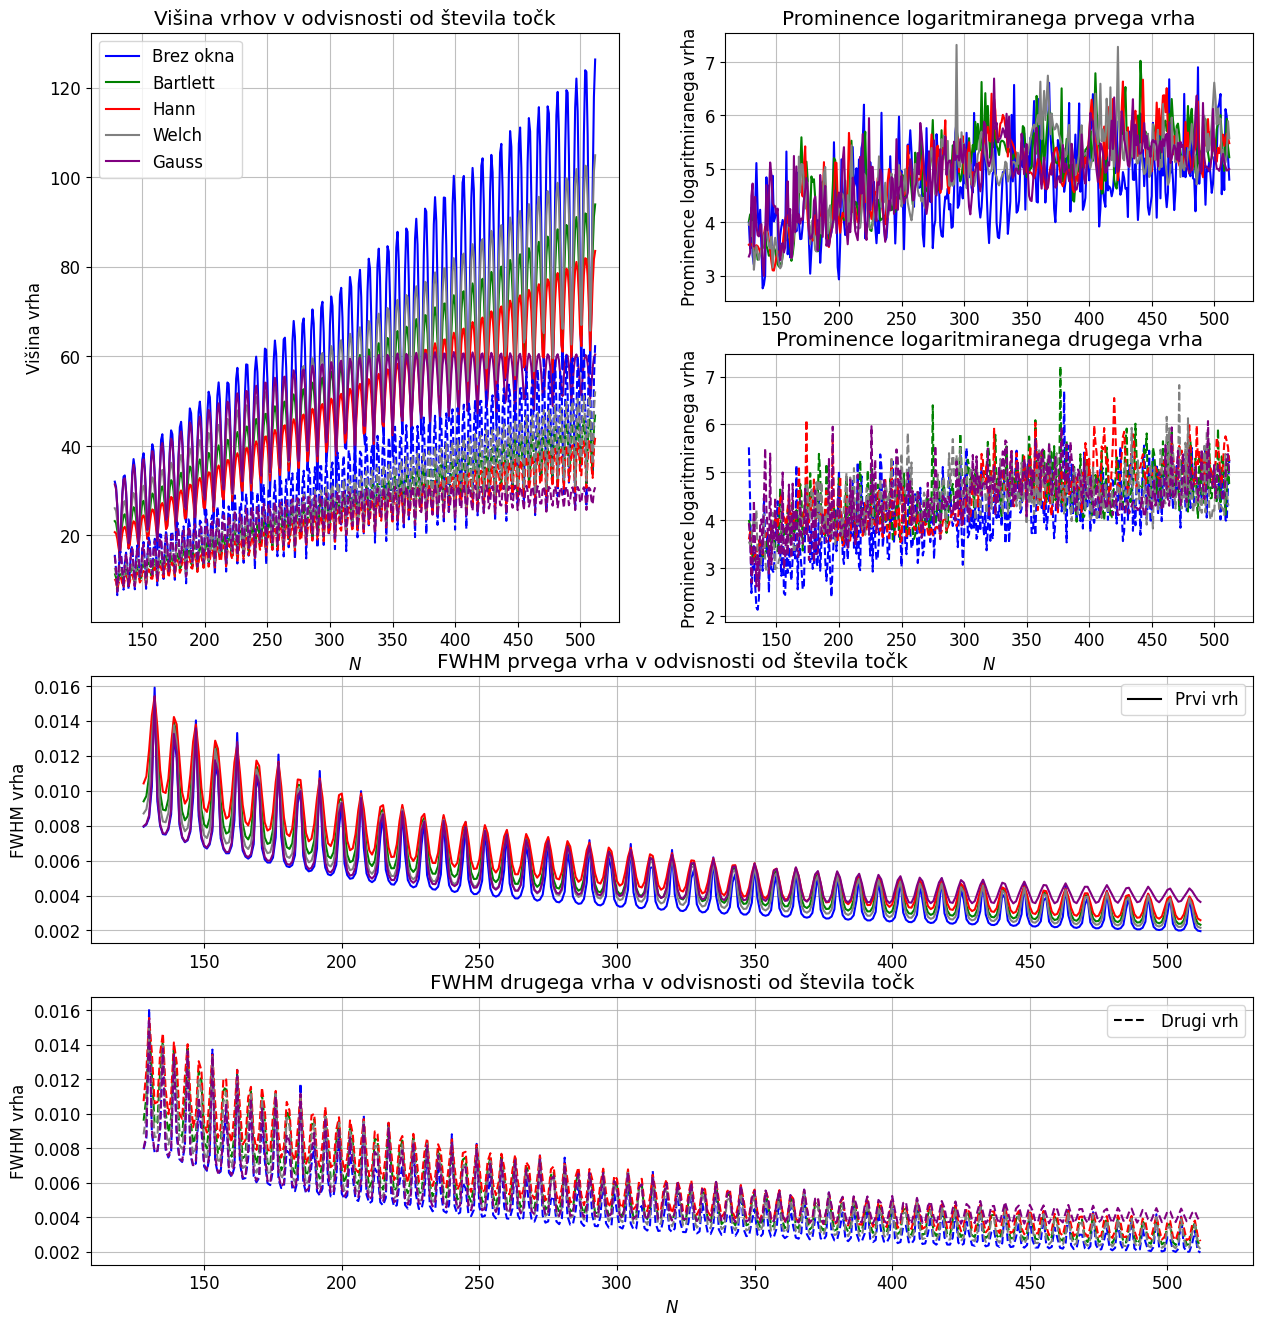

In [527]:
fig = plt.figure(figsize=(15, 16))

ax = fig.add_subplot(4, 2, (1,3))
ax.grid(alpha=0.8)
ax.set_title('Višina vrhov v odvisnosti od števila točk')
ax.set_ylabel('Višina vrha')
ax.set_xlabel(r'$N$')
ax.plot(Ns, heights11['Brez okna'], label='Brez okna', color='Blue')
ax.plot(Ns, heights11['Bartlett'], label='Bartlett', color='Green')
ax.plot(Ns, heights11['Hann'], label='Hann', color='Red')
ax.plot(Ns, heights11['Welch'], label='Welch', color='Gray')
ax.plot(Ns, heights11['Gauss'], label='Gauss', color='Purple')
ax.plot(Ns, heights12['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, heights12['Bartlett'], ls='--', color='Green')
ax.plot(Ns, heights12['Hann'], ls='--', color='Red')
ax.plot(Ns, heights12['Welch'], ls='--', color='Gray')
ax.plot(Ns, heights12['Gauss'], ls='--', color='Purple')
ax.legend()

ax = fig.add_subplot(4, 2, (5, 6))
ax.grid(alpha=0.8)
ax.set_title('FWHM prvega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.plot(200, 0.0075, color='black', label='Prvi vrh')
ax.plot(Ns, FWHMs11['Brez okna'], color='Blue')
ax.plot(Ns, FWHMs11['Bartlett'], color='Green')
ax.plot(Ns, FWHMs11['Hann'], color='Red')
ax.plot(Ns, FWHMs11['Welch'], color='Gray')
ax.plot(Ns, FWHMs11['Gauss'], color='Purple')
ax.legend()

ax = fig.add_subplot(4, 2, (7, 8))
ax.grid(alpha=0.8)
ax.set_title('FWHM drugega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.set_xlabel(r'$N$')
ax.plot(200, 0.0075, color='black', ls='--', label='Drugi vrh')
ax.plot(Ns, FWHMs12['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, FWHMs12['Bartlett'], ls='--', color='Green')
ax.plot(Ns, FWHMs12['Hann'], ls='--', color='Red')
ax.plot(Ns, FWHMs12['Welch'], ls='--', color='Gray')
ax.plot(Ns, FWHMs12['Gauss'], ls='--', color='Purple')
ax.legend()

# ax = fig.add_subplot(4, 2, (5,7))
# ax.grid(alpha=0.8)
# ax.set_title('Prominence vrhov v odvisnosti od števila točk')
# ax.set_ylabel('Prominence vrha')
# ax.set_xlabel(r'$N$')
# ax.plot(Ns, prominences_abs11['Brez okna'], label='Brez okna', color='Blue')
# ax.plot(Ns, prominences_abs11['Bartlett'], label='Bartlett', color='Green')
# ax.plot(Ns, prominences_abs11['Hann'], label='Hann', color='Red')
# ax.plot(Ns, prominences_abs11['Welch'], label='Welch', color='Gray')
# ax.plot(Ns, prominences_abs11['Gauss'], label='Gauss', color='Purple')
# ax.plot(Ns, prominences_abs12['Brez okna'], ls='--', color='Blue')
# ax.plot(Ns, prominences_abs12['Bartlett'], ls='--', color='Green')
# ax.plot(Ns, prominences_abs12['Hann'], ls='--', color='Red')
# ax.plot(Ns, prominences_abs12['Welch'], ls='--', color='Gray')
# ax.plot(Ns, prominences_abs12['Gauss'], ls='--', color='Purple')
# ax.legend()

ax = fig.add_subplot(4, 2, 2)
ax.grid(alpha=0.8)
ax.set_title('Prominence logaritmiranega prvega vrha')
ax.set_ylabel('Prominence logaritmiranega vrha')
ax.plot(Ns, prominences_rel11['Brez okna'], label='Brez okna', color='Blue')
ax.plot(Ns, prominences_rel11['Bartlett'], label='Bartlett', color='Green')
ax.plot(Ns, prominences_rel11['Hann'], label='Hann', color='Red')
ax.plot(Ns, prominences_rel11['Welch'], label='Welch', color='Gray')
ax.plot(Ns, prominences_rel11['Gauss'], label='Gauss', color='Purple')

ax = fig.add_subplot(4, 2, 4)
ax.grid(alpha=0.8)
ax.set_title('Prominence logaritmiranega drugega vrha')
ax.set_ylabel('Prominence logaritmiranega vrha')
ax.set_xlabel(r'$N$')
ax.plot(Ns, prominences_rel12['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, prominences_rel12['Bartlett'], ls='--', color='Green')
ax.plot(Ns, prominences_rel12['Hann'], ls='--', color='Red')
ax.plot(Ns, prominences_rel12['Welch'], ls='--', color='Gray')
ax.plot(Ns, prominences_rel12['Gauss'], ls='--', color='Purple')

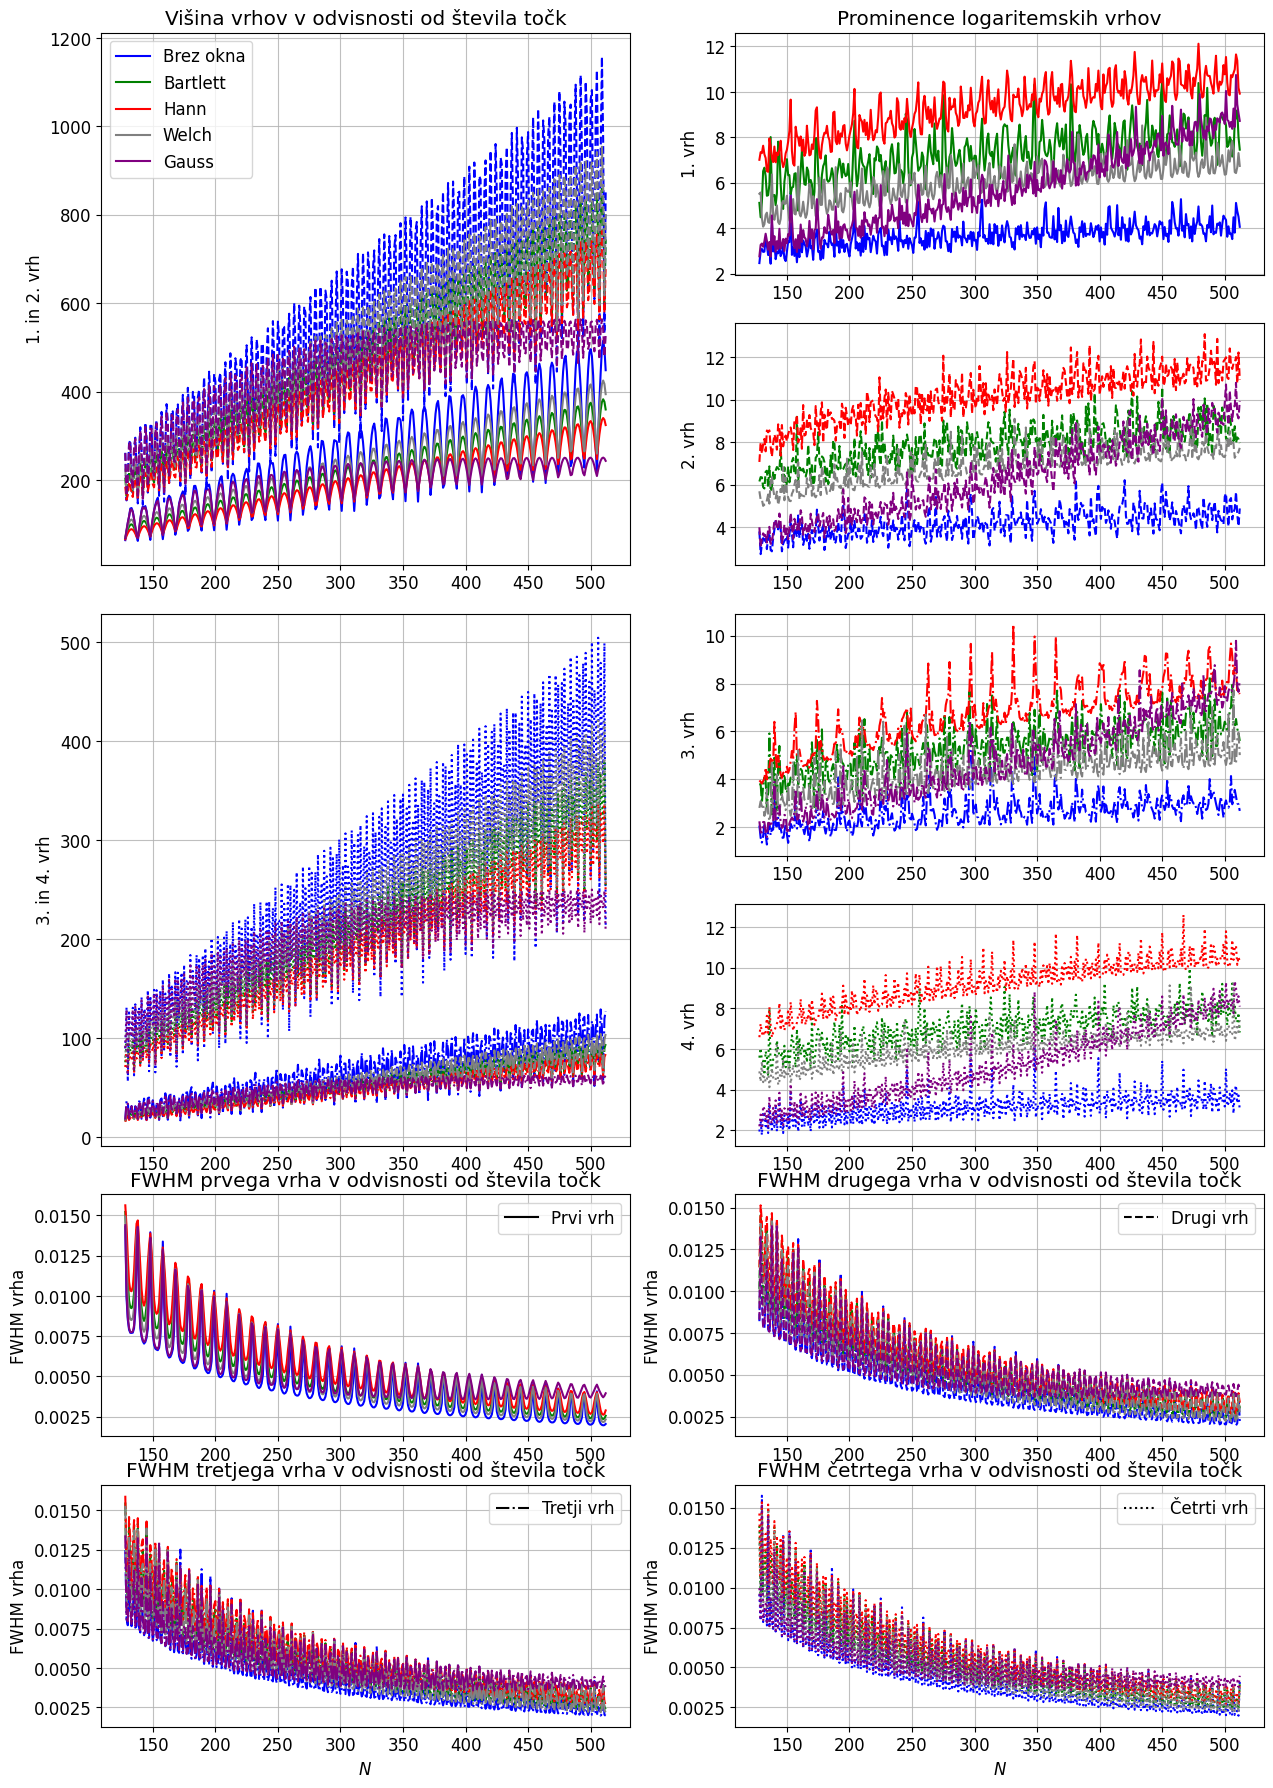

In [548]:
fig = plt.figure(figsize=(15, 22))

ax = fig.add_subplot(6, 2, (1,3))
ax.grid(alpha=0.8)
ax.set_title('Višina vrhov v odvisnosti od števila točk')
ax.set_ylabel('1. in 2. vrh')
ax.plot(Ns, heights21['Brez okna'], label='Brez okna', color='Blue')
ax.plot(Ns, heights21['Bartlett'], label='Bartlett', color='Green')
ax.plot(Ns, heights21['Hann'], label='Hann', color='Red')
ax.plot(Ns, heights21['Welch'], label='Welch', color='Gray')
ax.plot(Ns, heights21['Gauss'], label='Gauss', color='Purple')
ax.plot(Ns, heights22['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, heights22['Bartlett'], ls='--', color='Green')
ax.plot(Ns, heights22['Hann'], ls='--', color='Red')
ax.plot(Ns, heights22['Welch'], ls='--', color='Gray')
ax.plot(Ns, heights22['Gauss'], ls='--', color='Purple')
ax.legend()

ax = fig.add_subplot(6, 2, (5,7))
ax.grid(alpha=0.8)
ax.set_ylabel('3. in 4. vrh')
ax.plot(Ns, heights23['Brez okna'], ls='-.', color='Blue')
ax.plot(Ns, heights23['Bartlett'], ls='-.', color='Green')
ax.plot(Ns, heights23['Hann'], ls='-.', color='Red')
ax.plot(Ns, heights23['Welch'], ls='-.', color='Gray')
ax.plot(Ns, heights23['Gauss'], ls='-.', color='Purple')
ax.plot(Ns, heights24['Brez okna'], ls=':', color='Blue')
ax.plot(Ns, heights24['Bartlett'], ls=':', color='Green')
ax.plot(Ns, heights24['Hann'], ls=':', color='Red')
ax.plot(Ns, heights24['Welch'], ls=':', color='Gray')
ax.plot(Ns, heights24['Gauss'], ls=':', color='Purple')

ax = fig.add_subplot(6, 2, 9)
ax.grid(alpha=0.8)
ax.set_title('FWHM prvega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.plot(Ns[0], FWHMs21['Brez okna'][0], label='Prvi vrh', color='Black')
ax.plot(Ns, FWHMs21['Brez okna'], color='Blue')
ax.plot(Ns, FWHMs21['Bartlett'], color='Green')
ax.plot(Ns, FWHMs21['Hann'], color='Red')
ax.plot(Ns, FWHMs21['Welch'], color='Gray')
ax.plot(Ns, FWHMs21['Gauss'], color='Purple')
ax.legend()

ax = fig.add_subplot(6, 2, 10)
ax.grid(alpha=0.8)
ax.set_title('FWHM drugega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.plot(Ns[0], FWHMs22['Brez okna'][0], label='Drugi vrh', ls='--', color='Black')
ax.plot(Ns, FWHMs22['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, FWHMs22['Bartlett'], ls='--', color='Green')
ax.plot(Ns, FWHMs22['Hann'], ls='--', color='Red')
ax.plot(Ns, FWHMs22['Welch'], ls='--', color='Gray')
ax.plot(Ns, FWHMs22['Gauss'], ls='--', color='Purple')
ax.legend()

ax = fig.add_subplot(6, 2, 11)
ax.grid(alpha=0.8)
ax.set_title('FWHM tretjega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.set_xlabel(r'$N$')
ax.plot(Ns[0], FWHMs23['Brez okna'][0], label='Tretji vrh', ls='-.', color='Black')
ax.plot(Ns, FWHMs23['Brez okna'], ls='-.', color='Blue')
ax.plot(Ns, FWHMs23['Bartlett'], ls='-.', color='Green')
ax.plot(Ns, FWHMs23['Hann'], ls='-.', color='Red')
ax.plot(Ns, FWHMs23['Welch'], ls='-.', color='Gray')
ax.plot(Ns, FWHMs23['Gauss'], ls='-.', color='Purple')
ax.legend()

ax = fig.add_subplot(6, 2, 12)
ax.grid(alpha=0.8)
ax.set_title('FWHM četrtega vrha v odvisnosti od števila točk')
ax.set_ylabel('FWHM vrha')
ax.set_xlabel(r'$N$')
ax.plot(Ns[0], FWHMs24['Brez okna'][0], label='Četrti vrh', ls=':', color='Black')
ax.plot(Ns, FWHMs24['Brez okna'], ls=':', color='Blue')
ax.plot(Ns, FWHMs24['Bartlett'], ls=':', color='Green')
ax.plot(Ns, FWHMs24['Hann'], ls=':', color='Red')
ax.plot(Ns, FWHMs24['Welch'], ls=':', color='Gray')
ax.plot(Ns, FWHMs24['Gauss'], ls=':', color='Purple')
ax.legend()

ax = fig.add_subplot(6, 2, 2)
ax.grid(alpha=0.8)
ax.set_title('Prominence logaritemskih vrhov')
ax.set_ylabel('1. vrh')
ax.plot(Ns, prominences_rel21['Brez okna'], label='Brez okna', color='Blue')
ax.plot(Ns, prominences_rel21['Bartlett'], label='Bartlett', color='Green')
ax.plot(Ns, prominences_rel21['Hann'], label='Hann', color='Red')
ax.plot(Ns, prominences_rel21['Welch'], label='Welch', color='Gray')
ax.plot(Ns, prominences_rel21['Gauss'], label='Gauss', color='Purple')

ax = fig.add_subplot(6, 2, 4)
ax.grid(alpha=0.8)
ax.set_ylabel('2. vrh')
ax.plot(Ns, prominences_rel22['Brez okna'], ls='--', color='Blue')
ax.plot(Ns, prominences_rel22['Bartlett'], ls='--', color='Green')
ax.plot(Ns, prominences_rel22['Hann'], ls='--', color='Red')
ax.plot(Ns, prominences_rel22['Welch'], ls='--', color='Gray')
ax.plot(Ns, prominences_rel22['Gauss'], ls='--', color='Purple')

ax = fig.add_subplot(6, 2, 6)
ax.grid(alpha=0.8)
ax.set_ylabel('3. vrh')
ax.plot(Ns, prominences_rel23['Brez okna'], ls='-.', color='Blue')
ax.plot(Ns, prominences_rel23['Bartlett'], ls='-.', color='Green')
ax.plot(Ns, prominences_rel23['Hann'], ls='-.', color='Red')
ax.plot(Ns, prominences_rel23['Welch'], ls='-.', color='Gray')
ax.plot(Ns, prominences_rel23['Gauss'], ls='-.', color='Purple')

ax = fig.add_subplot(6, 2, 8)
ax.grid(alpha=0.8)
ax.set_ylabel('4. vrh')
ax.plot(Ns, prominences_rel24['Brez okna'], ls=':', color='Blue')
ax.plot(Ns, prominences_rel24['Bartlett'], ls=':', color='Green')
ax.plot(Ns, prominences_rel24['Hann'], ls=':', color='Red')
ax.plot(Ns, prominences_rel24['Welch'], ls=':', color='Gray')
ax.plot(Ns, prominences_rel24['Gauss'], ls=':', color='Purple')